<a href="https://colab.research.google.com/github/programmermahi/Machine-Learning-Lab/blob/main/19_07_25_CLP(221902083).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

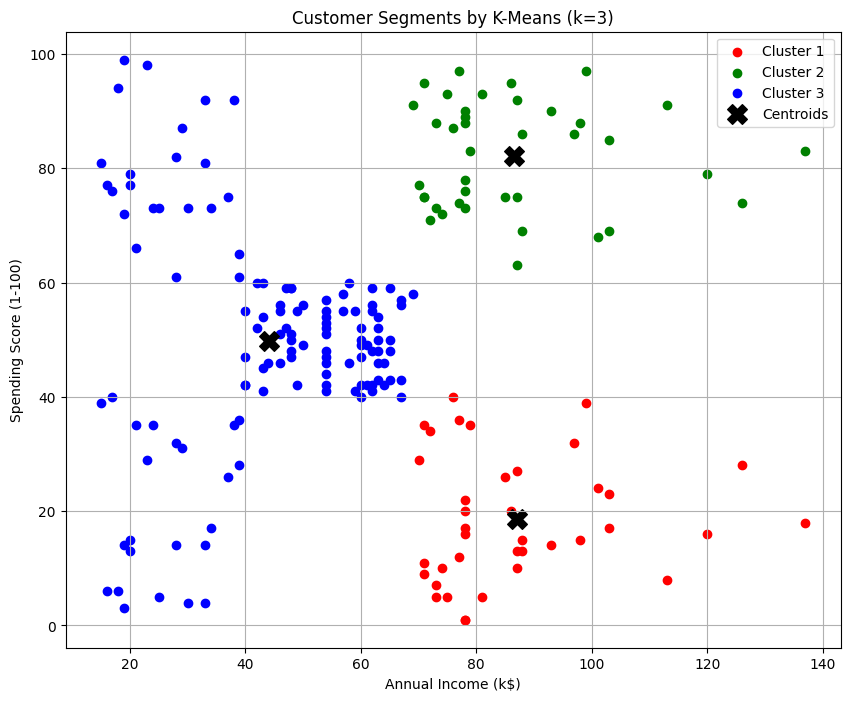

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to original dataframe
df['Cluster'] = kmeans.labels_

# Get centroids in scaled form and convert to original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        label=f'Cluster {i+1}',
        color=colors[i]
    )

# Plot centroid points
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X', s=200, c='black', label='Centroids'
)

plt.title('Customer Segments by K-Means (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

